<a href="https://colab.research.google.com/github/mirkhalilrehman/MaskRCNN-ImageSegmentation/blob/main/MaskRCNN_ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import cv2 as cv
from google.colab.patches import cv2_imshow
from torchvision.models.detection import maskrcnn_resnet50_fpn
import matplotlib.pyplot as plt

In [53]:
# Load pre-trained model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [54]:
# Transformation for input image
transform = transforms.ToTensor()

In [55]:
# Class names for COCO dataset
class_names = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
    "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack",
    "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball",
    "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
    "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
    "chair", "couch", "potted plant", "bed", "dining table", "toilet", "TV", "laptop",
    "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink",
    "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier",
    "toothbrush"
]


In [56]:
# Load and preprocess image
def load_image(image_path):
    image = Image.open(image_path)
    image_tensor = transform(image).unsqueeze(0)
    return image, image_tensor


In [57]:
# Function to predict and plot results
def predict_and_plot(model, image_tensor, original_image, score_threshold=0.70):
    with torch.no_grad():
        prediction = model(image_tensor)

    labels = prediction[0]['labels']
    masks = prediction[0]['masks']
    scores = prediction[0]['scores']

    # Filter results based on score threshold
    high_scores = (scores >= score_threshold).sum().item()

    for i in range(high_scores):
        plt.imshow(original_image)
        plt.imshow(masks[i, 0].cpu(), cmap="jet", alpha=0.5)
        plt.title(f"Object: {class_names[labels[i] - 1]}")
        plt.show()

    return masks[0, 0] > 0.5  # Return the first mask for further processing

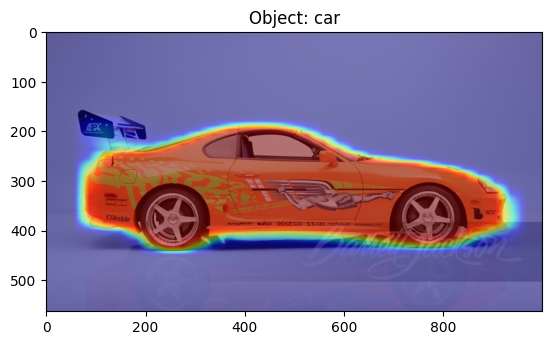

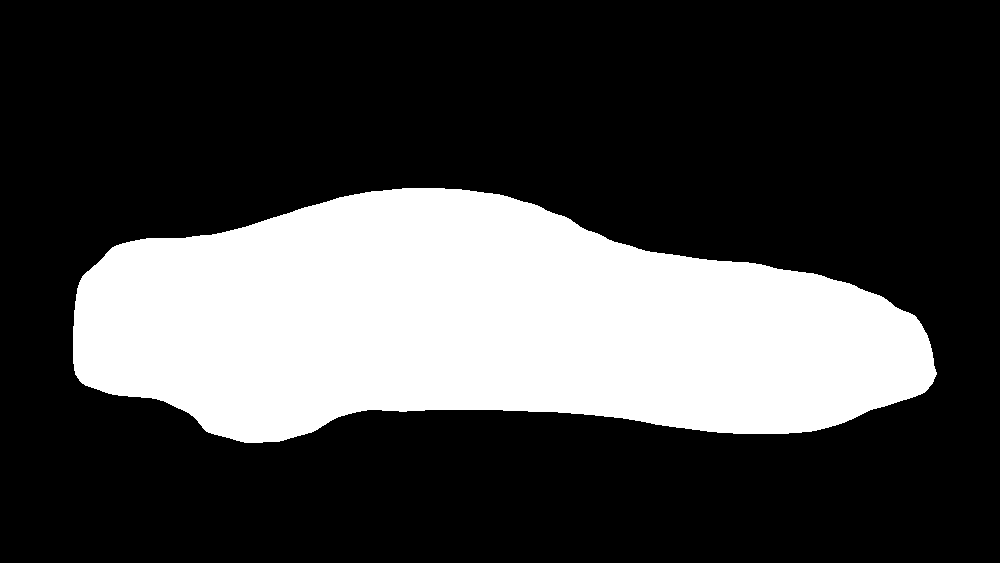

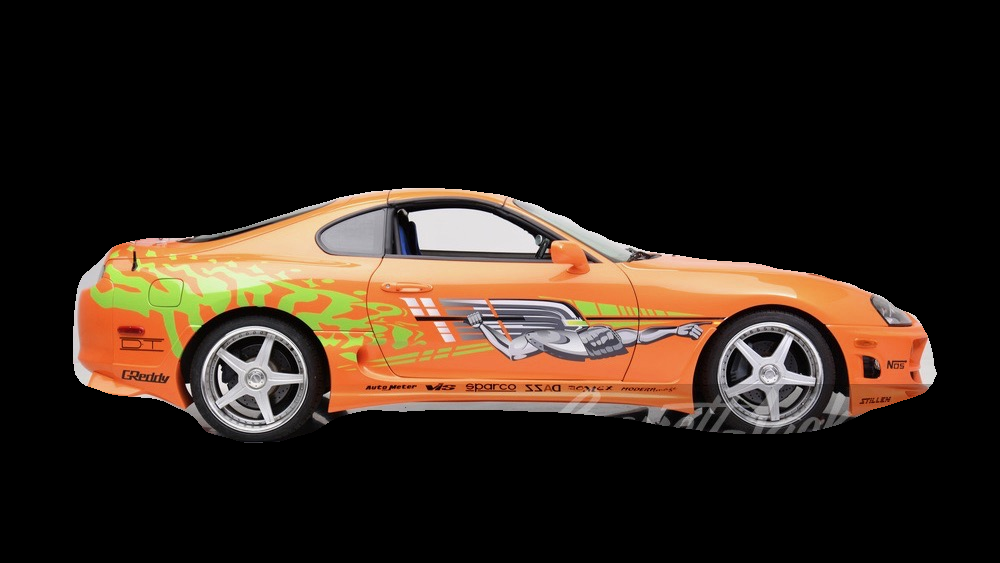

In [64]:
# Main code
image_path = '/content/vu.jpg'

try:
    original_image, image_tensor = load_image(image_path)
    plt.imshow(original_image)
    mask = predict_and_plot(model, image_tensor, original_image)

    # Convert mask to binary
    mask = mask.cpu().numpy().astype("uint8") * 255

    # Display mask and apply it to the image
    cv2_imshow(mask)
    img = cv.imread(image_path)
    final_masked_image = cv.bitwise_and(img, img, mask=mask)
    cv2_imshow(final_masked_image)

except FileNotFoundError:
    print(f"Error: File {image_path} not found.")

except Exception as e:
    print(f"An error occurred: {e}")